<a href="https://colab.research.google.com/github/SiddativeG/Marketing-Research-Models/blob/main/MRM_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-307e14f24a70>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=feedback_df, palette='viridis', order=["Negative", "Neutral", "Positive"])


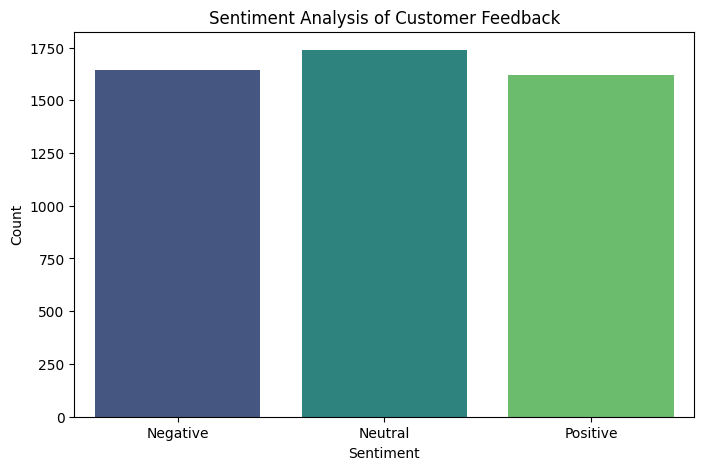

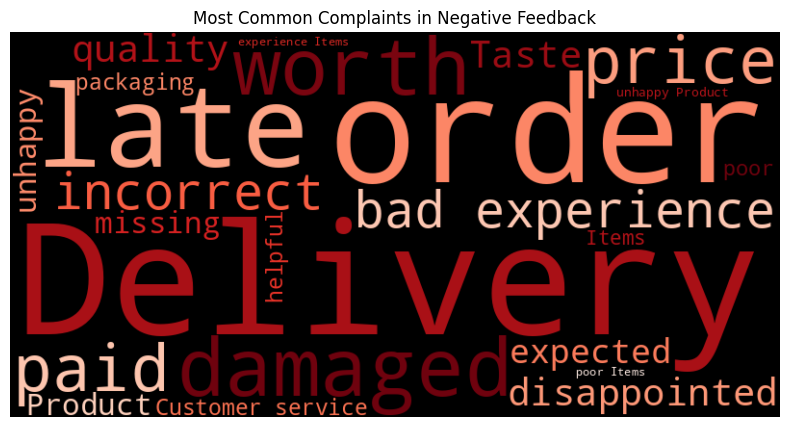

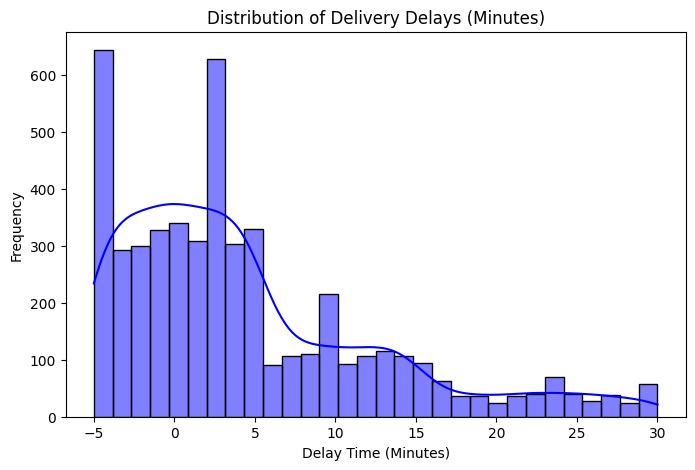

<ipython-input-2-307e14f24a70>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='spending_category', data=customers_df, palette='magma')


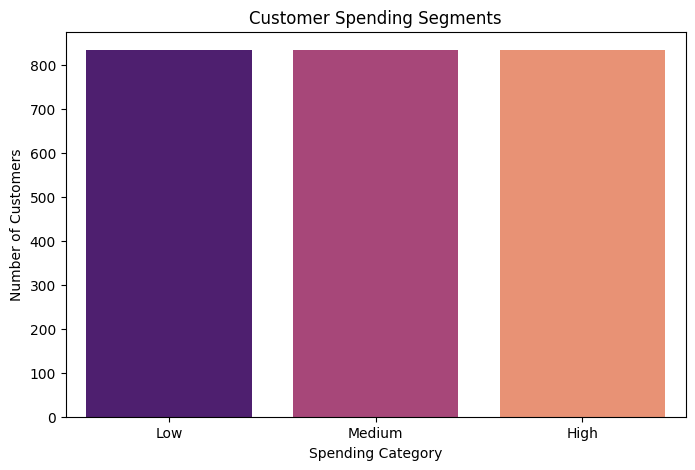

<ipython-input-2-307e14f24a70>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='channel', y='roas', data=marketing_df, palette='coolwarm')


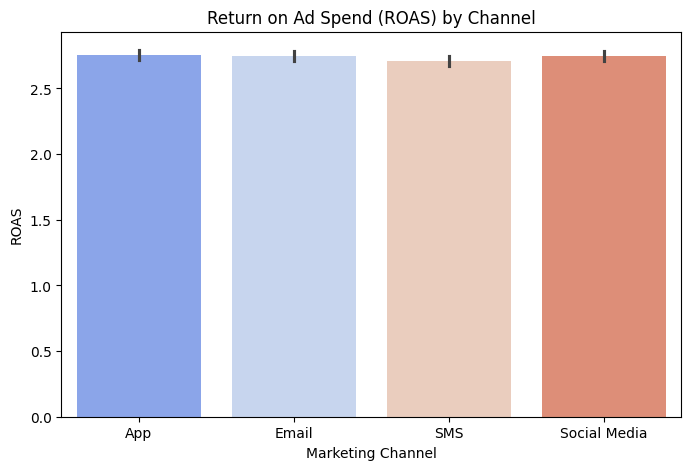

<ipython-input-2-307e14f24a70>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_name', y='quantity', data=product_sales.nlargest(10, 'quantity'), palette='coolwarm')


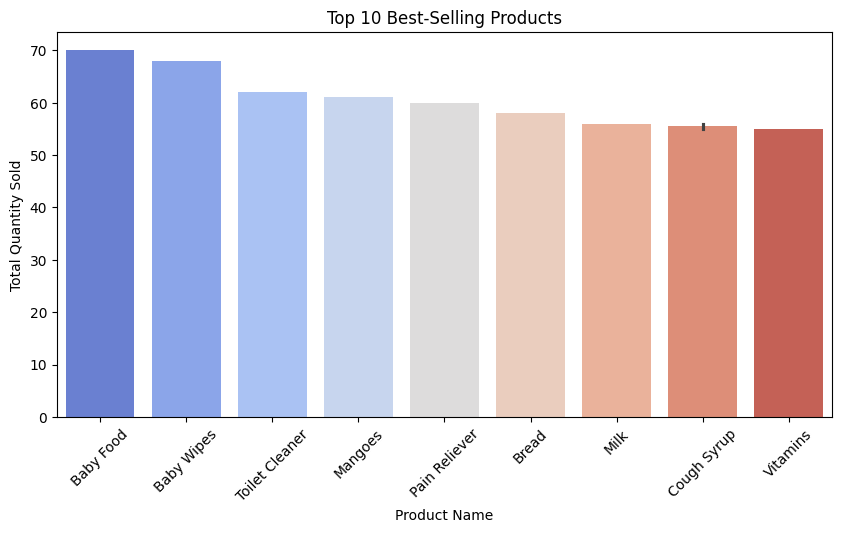

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


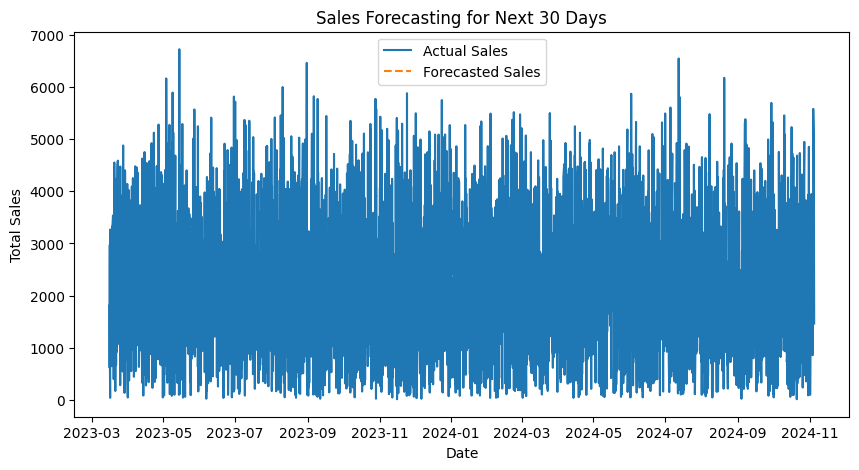

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load datasets
feedback_df = pd.read_csv("blinkit_customer_feedback.csv")
delivery_df = pd.read_csv("blinkit_delivery_performance.csv")
customers_df = pd.read_csv("blinkit_customers.csv")
marketing_df = pd.read_csv("blinkit_marketing_performance.csv")
products_df = pd.read_csv("blinkit_products.csv")
order_items_df = pd.read_csv("blinkit_order_items.csv")
orders_df = pd.read_csv("blinkit_orders.csv")
inventory_df = pd.read_csv("blinkit_inventory.csv")

# Convert dates to datetime format
feedback_df['feedback_date'] = pd.to_datetime(feedback_df['feedback_date'])
delivery_df['promised_time'] = pd.to_datetime(delivery_df['promised_time'])
delivery_df['actual_time'] = pd.to_datetime(delivery_df['actual_time'])
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])

# Calculate delay in minutes
delivery_df['delay_minutes'] = (delivery_df['actual_time'] - delivery_df['promised_time']).dt.total_seconds() / 60

# Sentiment Analysis Visualization
plt.figure(figsize=(8,5))
sns.countplot(x='sentiment', data=feedback_df, palette='viridis', order=["Negative", "Neutral", "Positive"])
plt.title("Sentiment Analysis of Customer Feedback")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Word Cloud for Negative Feedback
negative_feedback = feedback_df[feedback_df['sentiment'] == "Negative"]['feedback_text']
text = " ".join(negative_feedback.dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Complaints in Negative Feedback")
plt.show()

# Delivery Delay Analysis
plt.figure(figsize=(8,5))
sns.histplot(delivery_df['delay_minutes'], bins=30, kde=True, color='blue')
plt.title("Distribution of Delivery Delays (Minutes)")
plt.xlabel("Delay Time (Minutes)")
plt.ylabel("Frequency")
plt.show()

# Customer Spending Segments
customers_df['spending_category'] = pd.qcut(customers_df['avg_order_value'], q=3, labels=["Low", "Medium", "High"])
plt.figure(figsize=(8,5))
sns.countplot(x='spending_category', data=customers_df, palette='magma')
plt.title("Customer Spending Segments")
plt.xlabel("Spending Category")
plt.ylabel("Number of Customers")
plt.show()

# ROAS Analysis
plt.figure(figsize=(8,5))
sns.barplot(x='channel', y='roas', data=marketing_df, palette='coolwarm')
plt.title("Return on Ad Spend (ROAS) by Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("ROAS")
plt.show()

# Product Performance Analysis
product_sales = order_items_df.groupby('product_id')['quantity'].sum().reset_index()
product_sales = product_sales.merge(products_df, on='product_id')

# Top Selling Products
plt.figure(figsize=(10,5))
sns.barplot(x='product_name', y='quantity', data=product_sales.nlargest(10, 'quantity'), palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Sold")
plt.show()

# Sales Forecasting
sales_data = orders_df.groupby('order_date')['order_total'].sum().reset_index()
model = ExponentialSmoothing(sales_data['order_total'], trend='add', seasonal='add', seasonal_periods=7)
fit = model.fit()
sales_data['forecast'] = fit.forecast(steps=30)

plt.figure(figsize=(10,5))
plt.plot(sales_data['order_date'], sales_data['order_total'], label='Actual Sales')
plt.plot(sales_data['order_date'], sales_data['forecast'], linestyle='dashed', label='Forecasted Sales')
plt.title("Sales Forecasting for Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()